In [173]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [174]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [175]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [176]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [177]:
# Standardize the data
scaler = StandardScaler() #Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
df_market_data_scaled_df = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data
crypto_names = df_market_data.index #this returns a list of all the coin names from the original data coins

# Set the coin_id column as index
df_market_data_scaled_df.index = crypto_names

# Display sample data
df_market_data_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [178]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [232]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model
    model = KMeans(n_clusters=k, random_state=1)
    # Fit the model to the data
    model.fit(df_market_data_scaled_df)
    # Append the inertia to the list
    inertia_values.append(model.inertia_)


c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.tol = tol
c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  **_BaseKMeans._parameter_constraints,
c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.tol = tol
c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it b

In [180]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


In [181]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xlabel="Number of clusters (k)", ylabel="Inertia")

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [182]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans = KMeans(n_clusters=best_k, random_state=1)

In [183]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_market_data_scaled_df)

c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.tol = tol
c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  **_BaseKMeans._parameter_constraints,


KMeans(n_clusters=4, random_state=1)

In [184]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(df_market_data_scaled_df)

# Print the resulting array of cluster values.
print(cluster_labels)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [185]:
# Create a copy of the DataFrame
df_market_data_clustered = df_market_data_scaled_df.copy()

In [186]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_clustered['Cluster'] = cluster_labels

# Display sample data
df_market_data_clustered.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [187]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_clustered.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    by="Cluster", 
    hover_cols=["coin_id"], 
    title="Cryptocurrency Clusters"
)

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [188]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [189]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_market_data_clustered)

df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# View the first five rows of the DataFrame. 
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-1.585139,0.134394,0.545621
ethereum,-1.322581,0.054494,1.115709
tether,0.266335,-0.536409,-0.796946
ripple,0.257225,-0.592013,-0.646529
bitcoin-cash,-2.952250,0.422372,1.267894


In [190]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Display the explained variance ratio
explained_variance

array([0.37005408, 0.32322221, 0.19115222])

<Axes: >

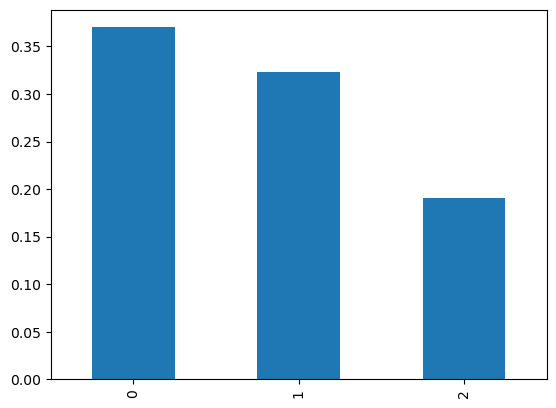

In [191]:
pd.Series(explained_variance).plot(kind='bar')

In [192]:
total_explained_variance = explained_variance.sum()

# Display the total explained variance
total_explained_variance

0.8844285111826466

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [193]:
# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Copy the crypto names from the original data
df_pca['Crypto Name'] = df_market_data.index

# Display sample data
df_pca.head()


,PC1,PC2,PC3,Crypto Name
coin_id,,,,
bitcoin,-1.585139,0.134394,0.545621,bitcoin
ethereum,-1.322581,0.054494,1.115709,ethereum
tether,0.266335,-0.536409,-0.796946,tether
ripple,0.257225,-0.592013,-0.646529,ripple
bitcoin-cash,-2.952250,0.422372,1.267894,bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In [101]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [194]:
# Create an empty list to store the inertia values
inertia2 = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
# 3. Append the model.inertia_ to the inertia list
    inertia2.append(kmeans.inertia_)

c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  **_BaseKMeans._parameter_constraints,
c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  **_BaseKMeans._parameter_constraints,
c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  **_BaseKMeans._parameter_constraints,
c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.

In [195]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {'k': k_values, 'inertia': inertia2}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow2 = pd.DataFrame(elbow_data2)
df_elbow2

,k,inertia
0,1,287.007838
1,2,196.268358
2,3,111.972027
3,4,43.205879
4,5,32.330891
5,6,24.347640
6,7,18.809109
7,8,15.637386
8,9,12.541932
9,10,9.543949


In [197]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow2.hvplot.line(x='k', y='inertia', title='Elbow Curve', xlabel='Number of clusters (k)', ylabel='Inertia')

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [201]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=1)

In [207]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])

c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.tol = tol
c:\Users\nduag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  **_BaseKMeans._parameter_constraints,


KMeans(n_clusters=4, random_state=1)

In [210]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4= kmeans.predict(df_pca[['PC1', 'PC2', 'PC3']])
# Print the resulting array of cluster values.
k_4

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [214]:
# Create a copy of the DataFrame with the PCA data
copy_df_pca= df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
copy_df_pca['predicted cluster'] = k_4

# Display sample data
copy_df_pca.head()

,PC1,PC2,PC3,Crypto Name,predicted cluster
coin_id,,,,,
bitcoin,-1.585139,0.134394,0.545621,bitcoin,1
ethereum,-1.322581,0.054494,1.115709,ethereum,1
tether,0.266335,-0.536409,-0.796946,tether,0
ripple,0.257225,-0.592013,-0.646529,ripple,0
bitcoin-cash,-2.952250,0.422372,1.267894,bitcoin-cash,1


In [225]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
copy_df_pca.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    by="predicted cluster", 
    hover_cols=["coin_id"], 
    title="Cryptocurrency Cluster"
)

:NdOverlay   [predicted cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [227]:
# Composite plot to contrast the Elbow curves
df_elbow.hvplot.line(x="k", y="inertia", title= "Elbow Curve 1", xticks=k) + df_elbow2.hvplot.line(x="k", y="inertia", title="Elbow Curve 2", xticks=k)


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [231]:
# Composite plot to contrast the clusters
df_market_data_clustered.hvplot.scatter( x='price_change_percentage_24h', y='price_change_percentage_7d', by='Cluster', hover_cols = 'coin_id') + copy_df_pca.hvplot.scatter(x="PC1", y="PC2", by = 'predicted cluster', hover_cols='coin_id')


:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** it resulted in a tighter cluster 